In [1]:
import numpy as np

def kpi(df):
    ''' Calculate BIAS ablolute and scaled
        Calculate MAPE
        MAE absolute and scaled
        RMSE
    '''
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs / dem_ave
    print('Bias: {:0.2f}, {:.2%}'.format(bias_abs, bias_rel))
    
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:.2%}'.format(MAPE))
    
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs / dem_ave
    print('MAE: {:0.2f}, {:.2%}'.format(MAE_abs, MAE_rel))
    
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs / dem_ave
    print('RMSE: {:0.2f}, {:.2%}'.format(RMSE_abs, RMSE_rel))

In [21]:
import numpy as np
import pandas as pd

def double_exp_smooth_damped(d, extra_periods=1, alpha=0.4, beta=0.4, phi=0.9):
    
    cols = len(d)
    d = np.append(d, [np.nan]*extra_periods)
    f,a,b = np.full((3, cols+extra_periods), np.nan)
    a[0] = d[0]
    b[0] = d[1] - d[0]
    
    for t in range(1,cols):
        f[t] = a[t-1] + phi*b[t-1]
        a[t] = alpha*d[t] + (1-alpha)*(a[t-1]+phi*b[t-1])
        b[t] = beta*(a[t]-a[t-1]) + (1-beta)*phi*b[t-1]
        
    for t in range(cols, cols+extra_periods):
        f[t] = a[t-1] + phi*b[t-1]
        a[t] = f[t]
        b[t] = phi*b[t-1]
            
    df = pd.DataFrame.from_dict({'Demand':d, 'Forecast':f, 'Level':a, 'Trend':b, 'Error':d-f})
    return df

In [24]:
d = [28, 19, 18, 13, 19, 16, 19, 18, 13, 16, 16, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]
df=double_exp_smooth_damped(d, extra_periods=4)
kpi(df)
print(df)

Bias: 1.64, 11.02%
MAPE: 22.75%
MAE: 3.48, 23.38%
RMSE: 4.72, 31.68%
    Demand   Forecast      Level     Trend      Error
0     28.0        NaN  28.000000 -9.000000        NaN
1     19.0  19.900000  19.540000 -8.244000  -0.900000
2     18.0  12.120400  14.472240 -6.478864   5.879600
3     13.0   8.641262  10.384757 -5.133580   4.358738
4     19.0   5.764536  11.058721 -2.502547  13.235464
5     16.0   8.806429  11.683857 -1.101321   7.193571
6     19.0  10.692668  14.015601  0.337984   8.307332
7     18.0  14.319786  15.791872  0.893020   3.680214
8     13.0  16.595590  15.157354  0.228423  -3.595590
9     16.0  15.362935  15.617761  0.307511   0.637065
10    16.0  15.894521  15.936713  0.293637   0.105479
11    11.0  16.200986  14.120592 -0.567885  -5.200986
12    18.0  13.609496  15.365697  0.191385   4.390504
13    15.0  15.537944  15.322766  0.086175  -0.537944
14    13.0  15.400324  14.440194 -0.306494  -2.400324
15    15.0  14.164350  14.498610 -0.142141   0.835650
16    13.0  1

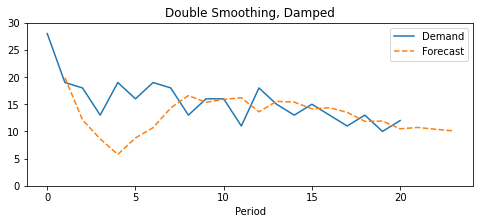

In [23]:
df.index.name='Period'
df[['Demand', 'Forecast']].plot(figsize=(8,3), title = 'Double Smoothing, Damped', ylim = (0,30), style = ['-', '--'])

In [30]:
d = [37,60,85,112,132,145,179,198,150,132]
df=double_exp_smooth_damped(d, extra_periods=3, alpha=0.3, beta=0.4, phi=0.8)
print(round(df,0))

    Demand  Forecast  Level  Trend  Error
0     37.0       NaN   37.0   23.0    NaN
1     60.0      55.0   57.0   19.0    5.0
2     85.0      72.0   76.0   17.0   13.0
3    112.0      89.0   96.0   16.0   23.0
4    132.0     109.0  116.0   16.0   23.0
5    145.0     128.0  133.0   15.0   17.0
6    179.0     145.0  155.0   16.0   34.0
7    198.0     168.0  177.0   16.0   30.0
8    150.0     190.0  178.0    8.0  -40.0
9    132.0     184.0  169.0    0.0  -52.0
10     NaN     169.0  169.0    0.0    NaN
11     NaN     169.0  169.0    0.0    NaN
12     NaN     169.0  169.0    0.0    NaN
